<div class="alert alert-block alert-info">    

# **Elders cluster**   
</div>

Group 47 

Rodrigo Silva 20230536 <br>
Nicolau Dulea 20230544 <br>
Joana Coelho Gonçalves - 20230977  

# Metadata

1. **_ID_** Unique identifier of the record
2. **_Age_** Age of the user at October 31st 2019 if it is not a dropout, or age of the user at date specified in attribute EnrollmentFinish if it is a dropout
3. _**Gender**_ Gender of the user (Male or Female)
4. _**Income** _Monthly salary of user
5. _**EnrollmentStart**_ Date of first enrollment
6. _**EnrollmentFinish**_ Finish date of last enrollment
7. _**LastPeriodStart**_ Start date of the last activity or the last two months if less
8. **_LastPeriodFinish_** End date of last activity or last two months if less
9. **_DateLastVisit_** Date and time of the user’s last visit to the sport facility
10. **_DaysWithoutFrequency_** Number of days the user did not visit the facilty before being considered a dropout
11. **_LifetimeValue_** Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish)
12. **_UseByTime_** Indicates whether the user was enrolled in this form of use (True if he was, False otherwise)
13. **_AthleticsActivities_** Indicates if the user was ever enrolled in athletics activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
14. **_WaterActivities_** 
15. **_FitnessActivities_** 
16. **_DanceActivities_** 
17. **_TeamActivities_** 
18. **_RacketActivities_** 
19. **_CombatActivities_** 
20. **_NatureActivities_** 
21. **_SpecialActivities_** Indicates if the user was enrolled in sports for disabled people during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
22. **_OtherActivities_** Indicates if the user was ever enrolled in other activities that does not fall into the other categories during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
23. **_NumberOfFrequencies_** Number of visits to the sports facility since the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish
24. **_AttendedClasses_** Number of classes the user attended between EnrollmentStart and EnrollmentFinish
25. **_AllowedWeeklyVisitsBySLA_** Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
26. **_AllowedNumberOfVisitsBySLA_** Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
27. **_RealNumberOfVisits_** Indicates the actual number of visits that the user made to the facilities in the last period his registration (between LastPeriodStart and LastPeriodFinish)
28. **_NumberOfRenewals_** Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)
29. **_HasReferences_** This field contains the value True if NumberOfReferences> 0, or False otherwise
30. **_NumberOfReferences_** Number of people with which the user is related by family relationship or friendship
31. **_Dropout_** Represents the user’s enrollment status, assuming the value True if he is quitting or False if he is not

# Imports

In [1]:
# Working with data
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer

# Tools for visualization
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from math import ceil


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('XYZ_sports_dataset.csv', sep=';', index_col = 'ID')

<div class="alert alert-block alert-info"> 

# Data exploration


In [3]:
# Segmentation

df = df[df['Age']>=65]

<div class="alert alert-block alert-success">

## Explore and fix datatypes
</div>

In [4]:
df.dtypes

Age                             int64
Gender                         object
Income                        float64
EnrollmentStart                object
EnrollmentFinish               object
LastPeriodStart                object
LastPeriodFinish               object
DateLastVisit                  object
DaysWithoutFrequency            int64
LifetimeValue                 float64
UseByTime                       int64
AthleticsActivities           float64
WaterActivities               float64
FitnessActivities             float64
DanceActivities               float64
TeamActivities                float64
RacketActivities              float64
CombatActivities              float64
NatureActivities              float64
SpecialActivities             float64
OtherActivities               float64
NumberOfFrequencies           float64
AttendedClasses                 int64
AllowedWeeklyVisitsBySLA      float64
AllowedNumberOfVisitsBySLA    float64
RealNumberOfVisits              int64
NumberOfRene

In [5]:
# Fix datatypes

# Date variables
df["EnrollmentFinish"] = pd.to_datetime(df["EnrollmentFinish"])
df["EnrollmentStart"] = pd.to_datetime(df["EnrollmentStart"])
df["LastPeriodFinish"] = pd.to_datetime(df["LastPeriodFinish"])
df["LastPeriodStart"] = pd.to_datetime(df["LastPeriodStart"])
df["DateLastVisit"] = pd.to_datetime(df["DateLastVisit"])

"""# Binary variables
df['AthleticsActivities'] = df['AthleticsActivities'].astype('boolean')
df['WaterActivities'] = df['WaterActivities'].astype('boolean')
df['FitnessActivities'] = df['FitnessActivities'].astype('boolean')
df['DanceActivities'] = df['DanceActivities'].astype('boolean')
df['TeamActivities'] = df['TeamActivities'].astype('boolean')
df['RacketActivities'] = df['RacketActivities'].astype('boolean')
df['CombatActivities'] = df['CombatActivities'].astype('boolean')
df['NatureActivities'] = df['NatureActivities'].astype('boolean')
df['SpecialActivities'] = df['SpecialActivities'].astype('boolean')
df['OtherActivities'] = df['OtherActivities'].astype('boolean')
df['HasReferences'] = df['HasReferences'].astype('boolean')
df['Dropout'] = df['Dropout'].astype('boolean')"""

"# Binary variables\ndf['AthleticsActivities'] = df['AthleticsActivities'].astype('boolean')\ndf['WaterActivities'] = df['WaterActivities'].astype('boolean')\ndf['FitnessActivities'] = df['FitnessActivities'].astype('boolean')\ndf['DanceActivities'] = df['DanceActivities'].astype('boolean')\ndf['TeamActivities'] = df['TeamActivities'].astype('boolean')\ndf['RacketActivities'] = df['RacketActivities'].astype('boolean')\ndf['CombatActivities'] = df['CombatActivities'].astype('boolean')\ndf['NatureActivities'] = df['NatureActivities'].astype('boolean')\ndf['SpecialActivities'] = df['SpecialActivities'].astype('boolean')\ndf['OtherActivities'] = df['OtherActivities'].astype('boolean')\ndf['HasReferences'] = df['HasReferences'].astype('boolean')\ndf['Dropout'] = df['Dropout'].astype('boolean')"

<div class="alert alert-block alert-success">

## Duplicated values
</div>

In [6]:
df.duplicated().sum()

0

In [7]:
# Create a copy to mantain original characteristics 
df_original = df.copy()

<div class="alert alert-block alert-success">

## Descriptive Statistics
</div>

In [8]:
df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10034   74  Female  5210.0      2019-10-01       2019-10-31      2019-07-01   
10095   83    Male  5080.0      2017-01-09       2017-01-09      2019-07-01   
10175   69  Female  5780.0      2015-10-06       2016-02-29      2015-07-01   
10217   69  Female  4120.0      2017-01-05       2019-09-10      2019-07-01   
10233   72  Female  5590.0      2015-04-27       2015-04-27      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10034       2019-12-31    2019-10-11                    20          38.50   
10095       2019-12-31    2019-10-30                     1         692.20   
10175       2016-06-30    2015-12-03                    88         166.60   
10217       2019-12-31    2019-07-30                    42         970.60   
10233       2019-12-31    2019-10-17                    14        1221.76   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10034  ...              0.0                  4.0                0   
10095  ...              0.0                291.0                0   
10175  ...              0.0                 14.0                0   
10217  ...              0.0                383.0                0   
10233  ...              0.0                166.0                1   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10034                       NaN                       30.03   
10095                       7.0                       59.01   
10175                       7.0                       62.02   
10217                       7.0                       62.02   
10233                       7.0                       17.01   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10034                   4                 0            0.0   
10095                  46                 3            0.0   
10175                   0                 0            0.0   
10217                  10                 3            0.0   
10233                   2                 5            0.0   

       NumberOfReferences  Dropout  
ID                                  
10034                   0        0  
10095                   0        0  
10175                   0        1  
10217                   0        1  
10233                   0        0  

[5 rows x 30 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 345 entries, 10034 to 24918
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Age                         345 non-null    int64         
 1   Gender                      345 non-null    object        
 2   Income                      345 non-null    float64       
 3   EnrollmentStart             345 non-null    datetime64[ns]
 4   EnrollmentFinish            345 non-null    datetime64[ns]
 5   LastPeriodStart             345 non-null    datetime64[ns]
 6   LastPeriodFinish            345 non-null    datetime64[ns]
 7   DateLastVisit               345 non-null    datetime64[ns]
 8   DaysWithoutFrequency        345 non-null    int64         
 9   LifetimeValue               345 non-null    float64       
 10  UseByTime                   345 non-null    int64         
 11  AthleticsActivities         345 non-null    float64      

We can consider this group already a cluster, due to the number of instances. <br>
All activities and 'hasreferences' appear as floats, although they are bools. We need to take this into consideration.

In [10]:
df.describe(include="all").T

count unique     top freq  \
Age                         345.0    NaN     NaN  NaN   
Gender                        345      2  Female  218   
Income                      345.0    NaN     NaN  NaN   
EnrollmentStart               345    NaN     NaN  NaN   
EnrollmentFinish              345    NaN     NaN  NaN   
LastPeriodStart               345    NaN     NaN  NaN   
LastPeriodFinish              345    NaN     NaN  NaN   
DateLastVisit                 345    NaN     NaN  NaN   
DaysWithoutFrequency        345.0    NaN     NaN  NaN   
LifetimeValue               345.0    NaN     NaN  NaN   
UseByTime                   345.0    NaN     NaN  NaN   
AthleticsActivities         345.0    NaN     NaN  NaN   
WaterActivities             344.0    NaN     NaN  NaN   
FitnessActivities           344.0    NaN     NaN  NaN   
DanceActivities             344.0    NaN     NaN  NaN   
TeamActivities              345.0    NaN     NaN  NaN   
RacketActivities            343.0    NaN     NaN  NaN   
CombatActivities            345.0    NaN     NaN  NaN   
NatureActivities            344.0    NaN     NaN  NaN   
SpecialActivities           344.0    NaN     NaN  NaN   
OtherActivities             345.0    NaN     NaN  NaN   
NumberOfFrequencies         343.0    NaN     NaN  NaN   
AttendedClasses             345.0    NaN     NaN  NaN   
AllowedWeeklyVisitsBySLA    332.0    NaN     NaN  NaN   
AllowedNumberOfVisitsBySLA  345.0    NaN     NaN  NaN   
RealNumberOfVisits          345.0    NaN     NaN  NaN   
NumberOfRenewals            345.0    NaN     NaN  NaN   
HasReferences               345.0    NaN     NaN  NaN   
NumberOfReferences          345.0    NaN     NaN  NaN   
Dropout                     345.0    NaN     NaN  NaN   

                                                     mean  \
Age                                             71.046377   
Gender                                                NaN   
Income                                        5526.521739   
EnrollmentStart             2017-01-22 01:44:20.869565184   
EnrollmentFinish            2017-11-06 00:16:41.739130368   
LastPeriodStart             2018-03-09 18:13:33.913043456   
LastPeriodFinish            2018-11-02 20:31:18.260869632   
DateLastVisit               2018-06-16 13:33:54.782608640   
DaysWithoutFrequency                            75.272464   
LifetimeValue                                  417.661072   
UseByTime                                        0.034783   
AthleticsActivities                              0.008696   
WaterActivities                                  0.203488   
FitnessActivities                                 0.65407   
DanceActivities                                       0.0   
TeamActivities                                        0.0   
RacketActivities                                 0.002915   
CombatActivities                                 0.005797   
NatureActivities                                      0.0   
SpecialActivities                                0.238372   
OtherActivities                                       0.0   
NumberOfFrequencies                              78.61516   
AttendedClasses                                  8.197101   
AllowedWeeklyVisitsBySLA                         6.325301   
AllowedNumberOfVisitsBySLA                      46.759333   
RealNumberOfVisits                               7.852174   
NumberOfRenewals                                 1.681159   
HasReferences                                    0.014493   
NumberOfReferences                               0.014493   
Dropout                                          0.611594   

                                            min                  25%  \
Age                                        65.0                 67.0   
Gender                                      NaN                  NaN   
Income                                    850.0               4480.0   
EnrollmentStart             2014-06-02 00:00:00  2015-09-17 00:00:00   
Enrollme

<div class="alert alert-block alert-success">

## Coherence checking

</div>

In [11]:
# Can AllowedWeeklyVisitsBySLA > AllowedNumberOfVisitsBySLA?

df[df['AllowedWeeklyVisitsBySLA']>df['AllowedNumberOfVisitsBySLA']]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10648   66  Female  3470.0      2019-07-10       2019-10-31      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10648       2019-12-31    2019-10-31                     0           99.7   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10648  ...              0.0                 17.0                0   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10648                       7.0                        6.02   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10648                   2                 1            0.0   

       NumberOfReferences  Dropout  
ID                                  
10648                   0        1  

[1 rows x 30 columns]

It doesn't make sense that a customer has more weekly visits than total visits. One approach could be to delete these variables, but due to the small number of instances and the possibility of using these variables for feature engineering, we'll assume weekly as being equal to total.

In [12]:
condition = df['AllowedWeeklyVisitsBySLA']>df['AllowedNumberOfVisitsBySLA']

df.loc[condition, 'AllowedNumberOfVisitsBySLA'] = df.loc[condition, 'AllowedWeeklyVisitsBySLA']

In [13]:
# Can a person have references, but then have 0 as number of references?
df[(df["HasReferences"] > 0) & (df["NumberOfReferences"]==0)]

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

[0 rows x 30 columns]

It does not make sense that the date of start and finish of enrollment are the same, especially when the date of last visit is greater.

In [14]:
df[df['EnrollmentStart']==df['EnrollmentFinish']]

Age  Gender  Income EnrollmentStart EnrollmentFinish LastPeriodStart  \
ID                                                                            
10095   83    Male  5080.0      2017-01-09       2017-01-09      2019-07-01   
10233   72  Female  5590.0      2015-04-27       2015-04-27      2019-07-01   
10328   78  Female  4940.0      2018-09-24       2018-09-24      2019-07-01   
10449   66  Female  7140.0      2016-09-13       2016-09-13      2019-07-01   
10572   69  Female  7910.0      2018-12-10       2018-12-10      2019-07-01   
...    ...     ...     ...             ...              ...             ...   
24637   73  Female  6330.0      2016-10-04       2016-10-04      2019-07-01   
24682   67  Female  3730.0      2015-03-06       2015-03-06      2019-07-01   
24687   65  Female  8170.0      2017-10-30       2017-10-30      2019-07-01   
24751   73  Female  6570.0      2018-09-24       2018-09-24      2019-07-01   
24918   73    Male  3870.0      2014-12-10       2014-12-10      2019-07-01   

      LastPeriodFinish DateLastVisit  DaysWithoutFrequency  LifetimeValue  \
ID                                                                          
10095       2019-12-31    2019-10-30                     1         692.20   
10233       2019-12-31    2019-10-17                    14        1221.76   
10328       2019-12-31    2019-10-29                     2          90.60   
10449       2019-12-31    2019-07-22                   101        1124.85   
10572       2019-12-31    2019-10-31                     0         350.40   
...                ...           ...                   ...            ...   
24637       2019-12-31    2019-10-31                     0         177.80   
24682       2019-12-31    2019-10-31                     0        1491.50   
24687       2019-12-31    2019-10-24                     7         779.78   
24751       2019-12-31    2019-07-29                    94         356.80   
24918       2019-12-31    2019-10-31                     0        1583.90   

       ...  OtherActivities  NumberOfFrequencies  AttendedClasses  \
ID     ...                                                          
10095  ...              0.0                291.0                0   
10233  ...              0.0                166.0                1   
10328  ...              0.0                 66.0                0   
10449  ...              0.0                400.0                0   
10572  ...              0.0                103.0               15   
...    ...              ...                  ...              ...   
24637  ...              0.0                174.0                0   
24682  ...              0.0                299.0                0   
24687  ...              0.0                 60.0                0   
24751  ...              0.0                 43.0                0   
24918  ...              0.0                472.0                0   

       AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                            
10095                       7.0                       59.01   
10233                       7.0                       17.01   
10328                       7.0                       27.02   
10449                       7.0                       52.01   
10572                       7.0                       60.97   
...                         ...                         ...   
24637                       7.0                       23.03   
24682                       7.0                       60.97   
24687                       7.0                       60.97   
24751                       7.0                       62.02   
24918                       7.0                       60.97   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10095                  46                 3            0.0   
10233                   2                 5            0.0   
10328      

In [15]:
df[(df["Dropout"]== 1) & (df["EnrollmentFinish"] == df["EnrollmentStart"] )]

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

[0 rows x 30 columns]

We can see that none of these customers is a dropout and the date of the last visit is in the last semester of 2019. This means that these customers are still enrolled i.e., they don't have a date for 'EnrollmentFinish'. <br>
For the purpose of this analysis, let's consider their 'EnrollmentFinish' as the last day of 2019.

In [16]:
condition = df['EnrollmentStart']==df['EnrollmentFinish']
df.loc[condition, 'EnrollmentFinish'] = '2019-10-31'

In [17]:
# Check if there are extreme ages
df[df['Age']>100]

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

[0 rows x 30 columns]

<div class="alert alert-block alert-success">

## Definition of type of features
</div>

In [18]:
# Defining metric and non metric features

metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 
                   'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences']

date_features = ['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']

non_metric_features = df.columns.drop(metric_features+date_features).to_list()

<div class="alert alert-block alert-info">

# Data preparation


<div class="alert alert-block alert-success">

##  Outlier removal


<div class="alert alert-block alert-success">

## Metric features

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', s

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf

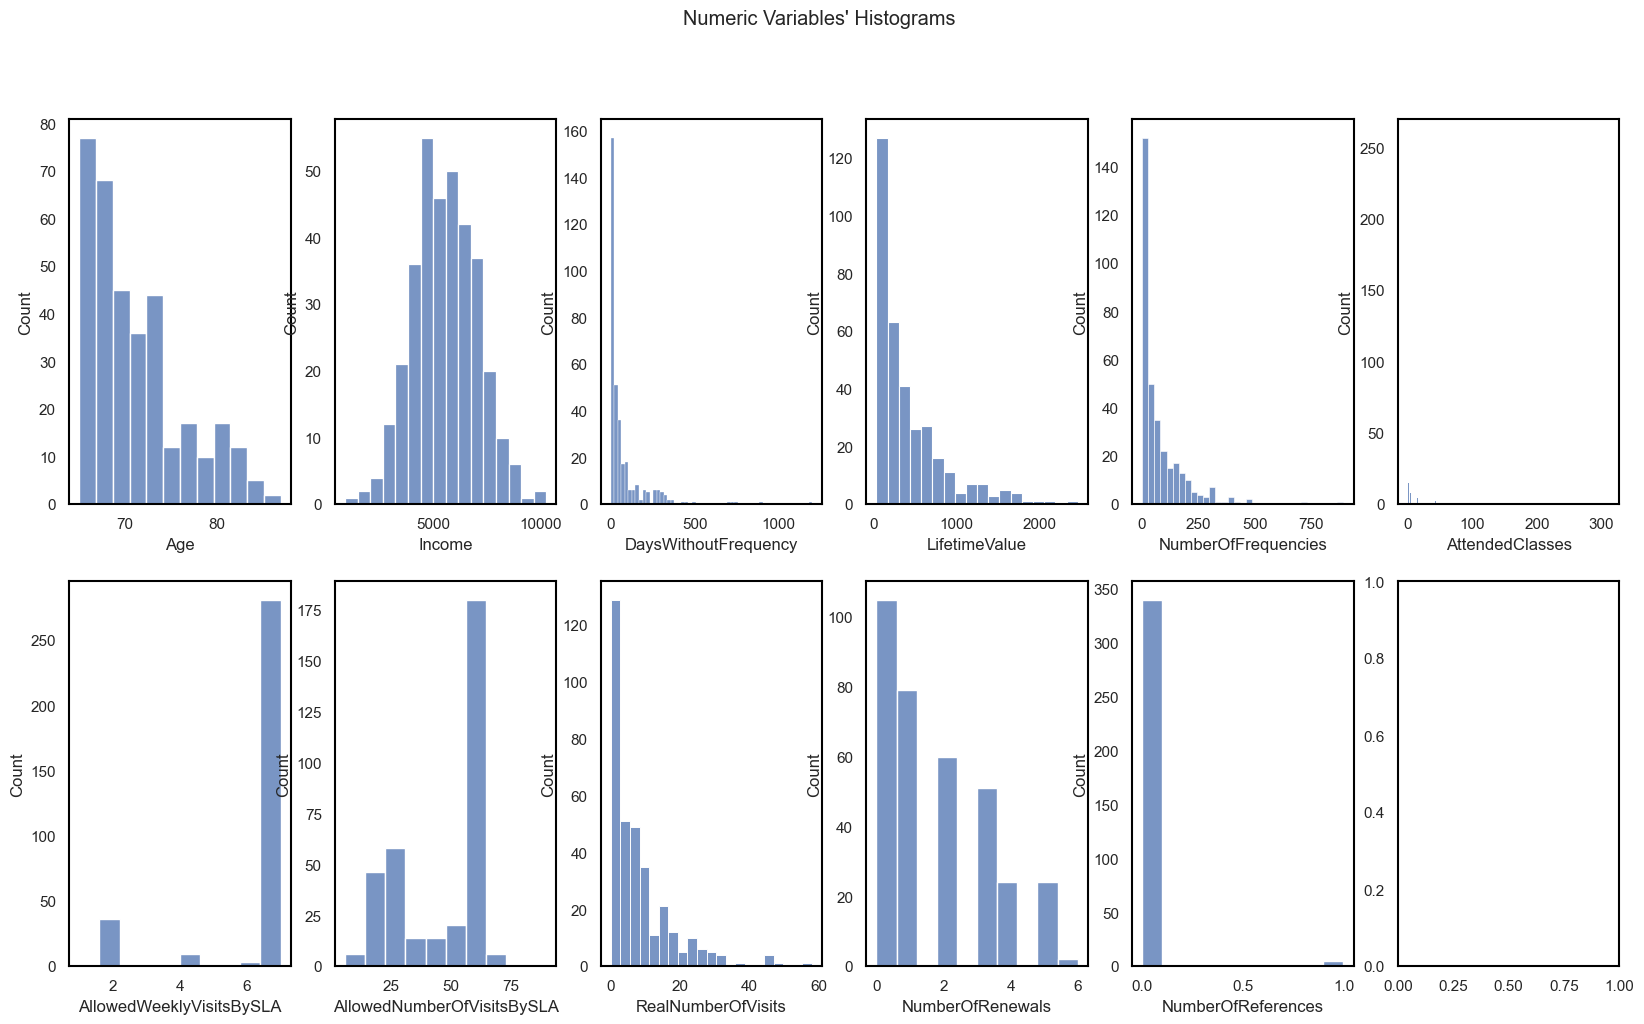

In [19]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], ax=ax)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.show()

vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03])
vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntr

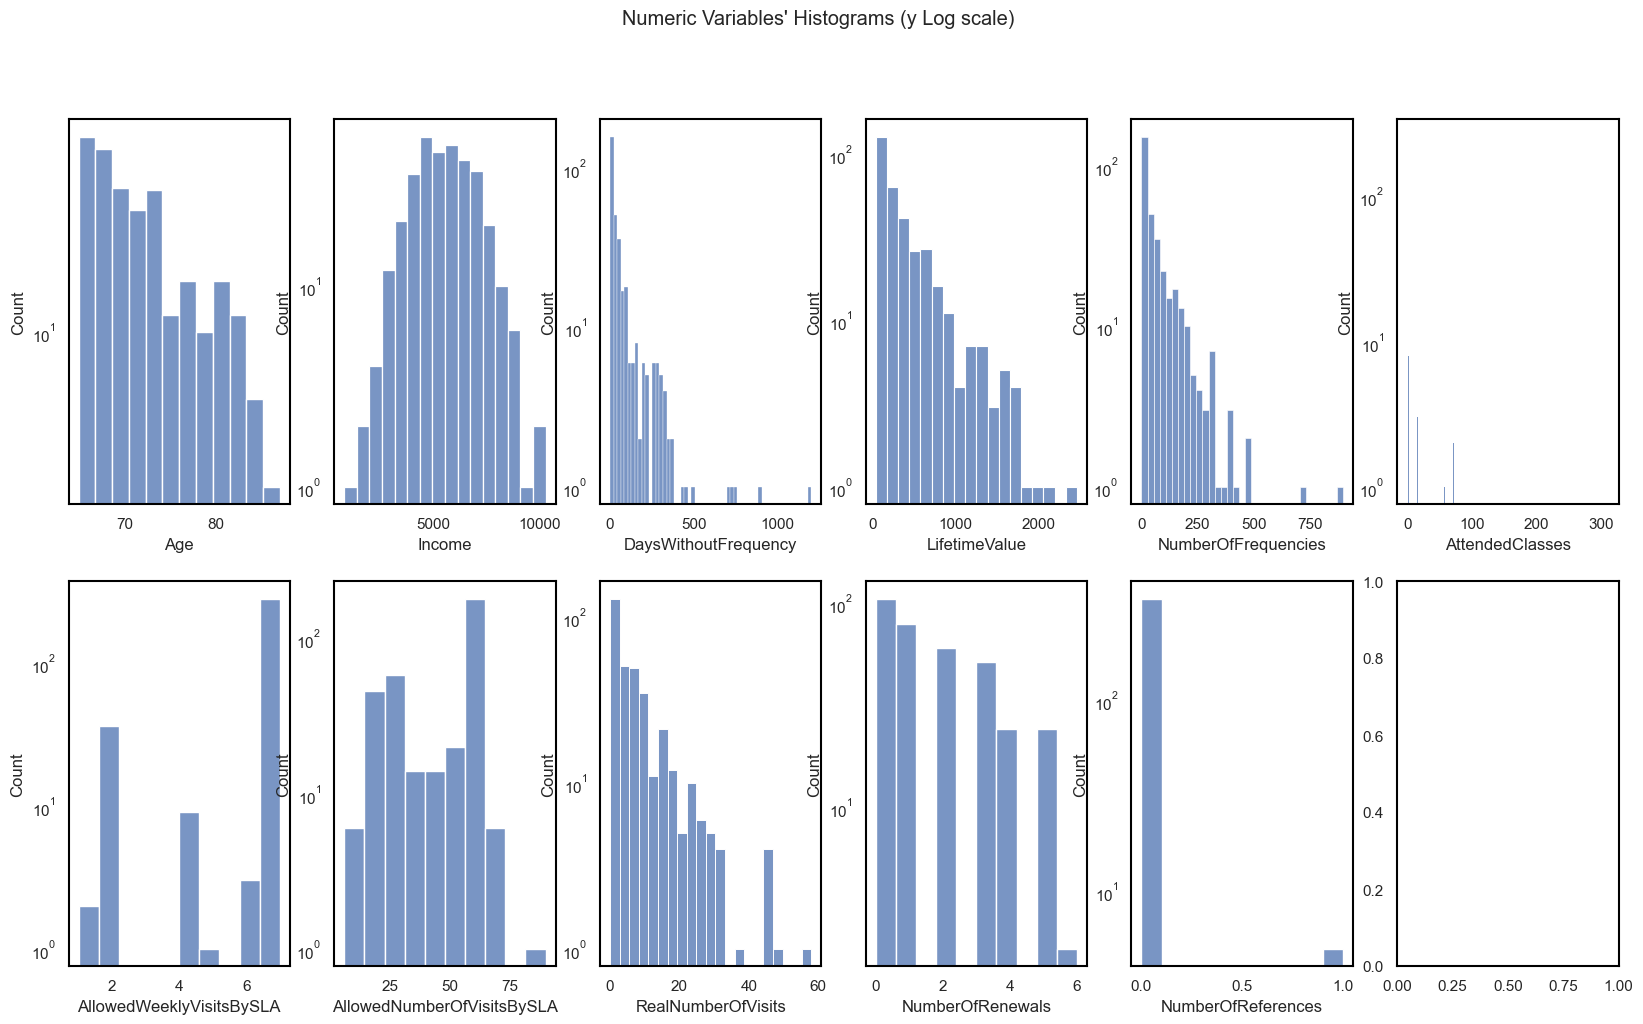

In [20]:
# All Numeric Variables' Histograms in one figure with log scale
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis
    
# Layout
title = "Numeric Variables' Histograms (y Log scale)"
plt.suptitle(title)
plt.show()

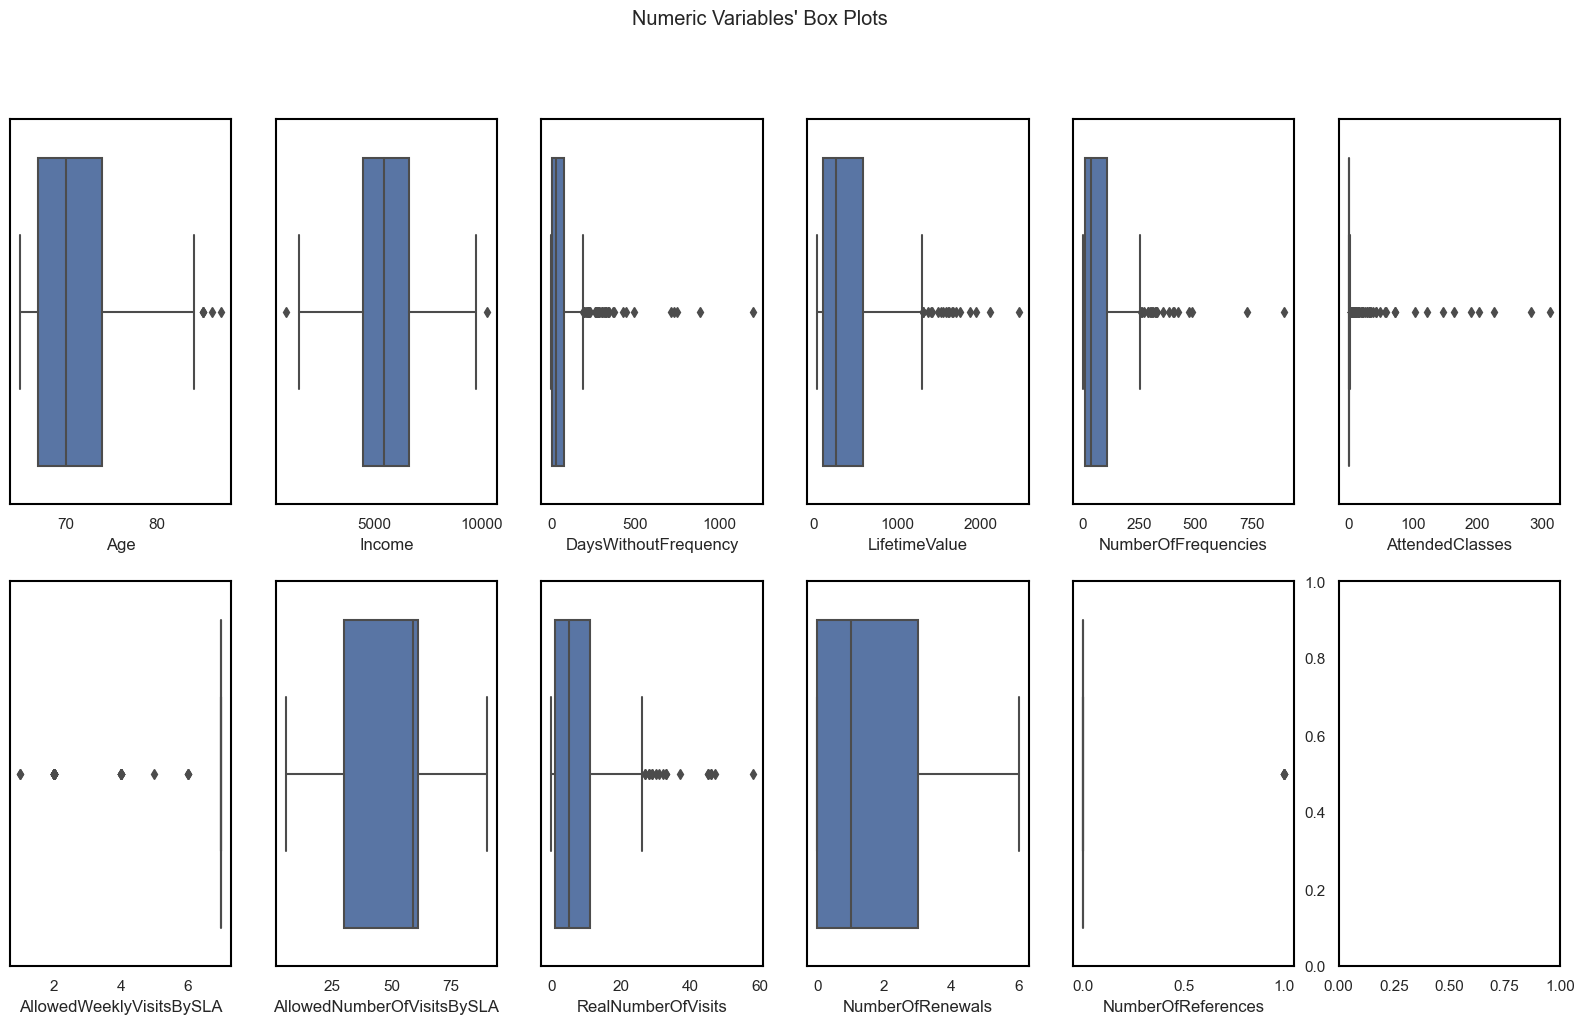

In [21]:
# Boxplots to visualise outliers
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

<div class="alert alert-block alert-success">

## Transformations
</div>
As we can see from the histograms, some features can benefit from a logarithmic transformation, due to their distribution being right-skewed.

In [22]:
features_transform = ['Age', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 'Income', 
                      'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals']

pt = PowerTransformer()
df[features_transform] = pd.DataFrame(pt.fit_transform(df[features_transform]), index=df[features_transform].index, columns=df[features_transform].columns)

vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([   1.,   10.,  100., 1000.])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([   1.,   10.,  100., 1000.])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([   1.,   10.,  100., 1000.])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03])
vmin 15.827358882177206 vmax 76.2603545534797
t

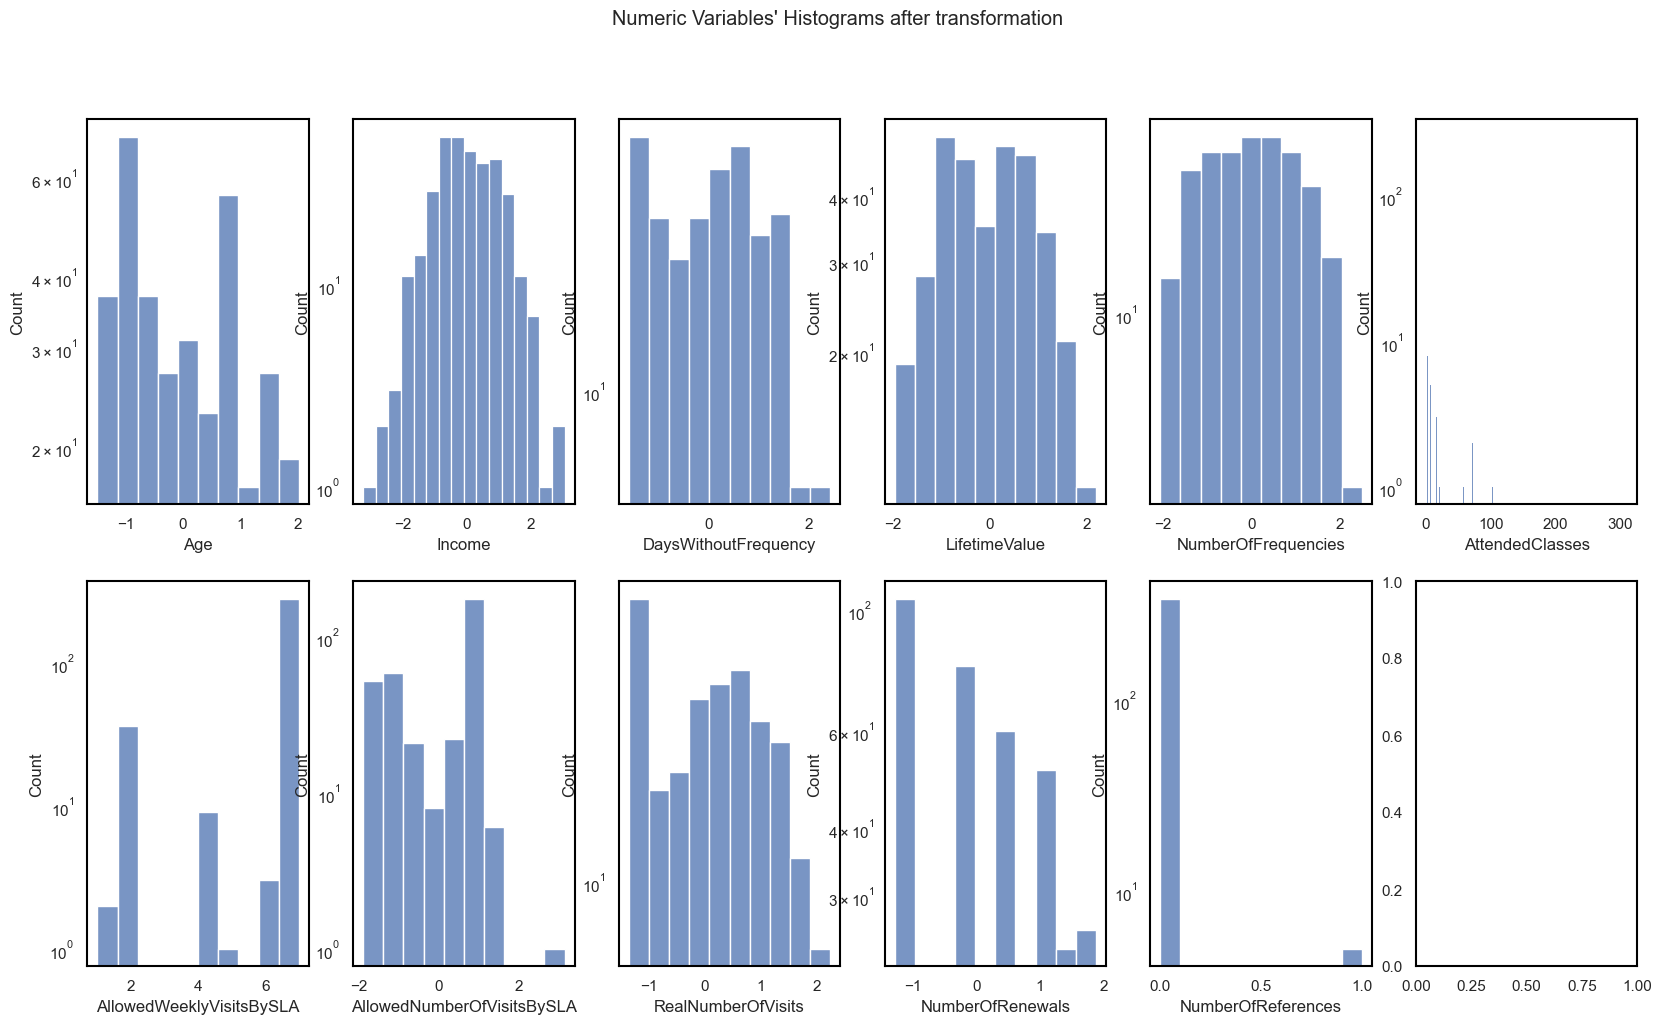

In [23]:
# Check distributions after transformation
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis
    
# Layout
title = "Numeric Variables' Histograms after transformation"
plt.suptitle(title)
plt.show()

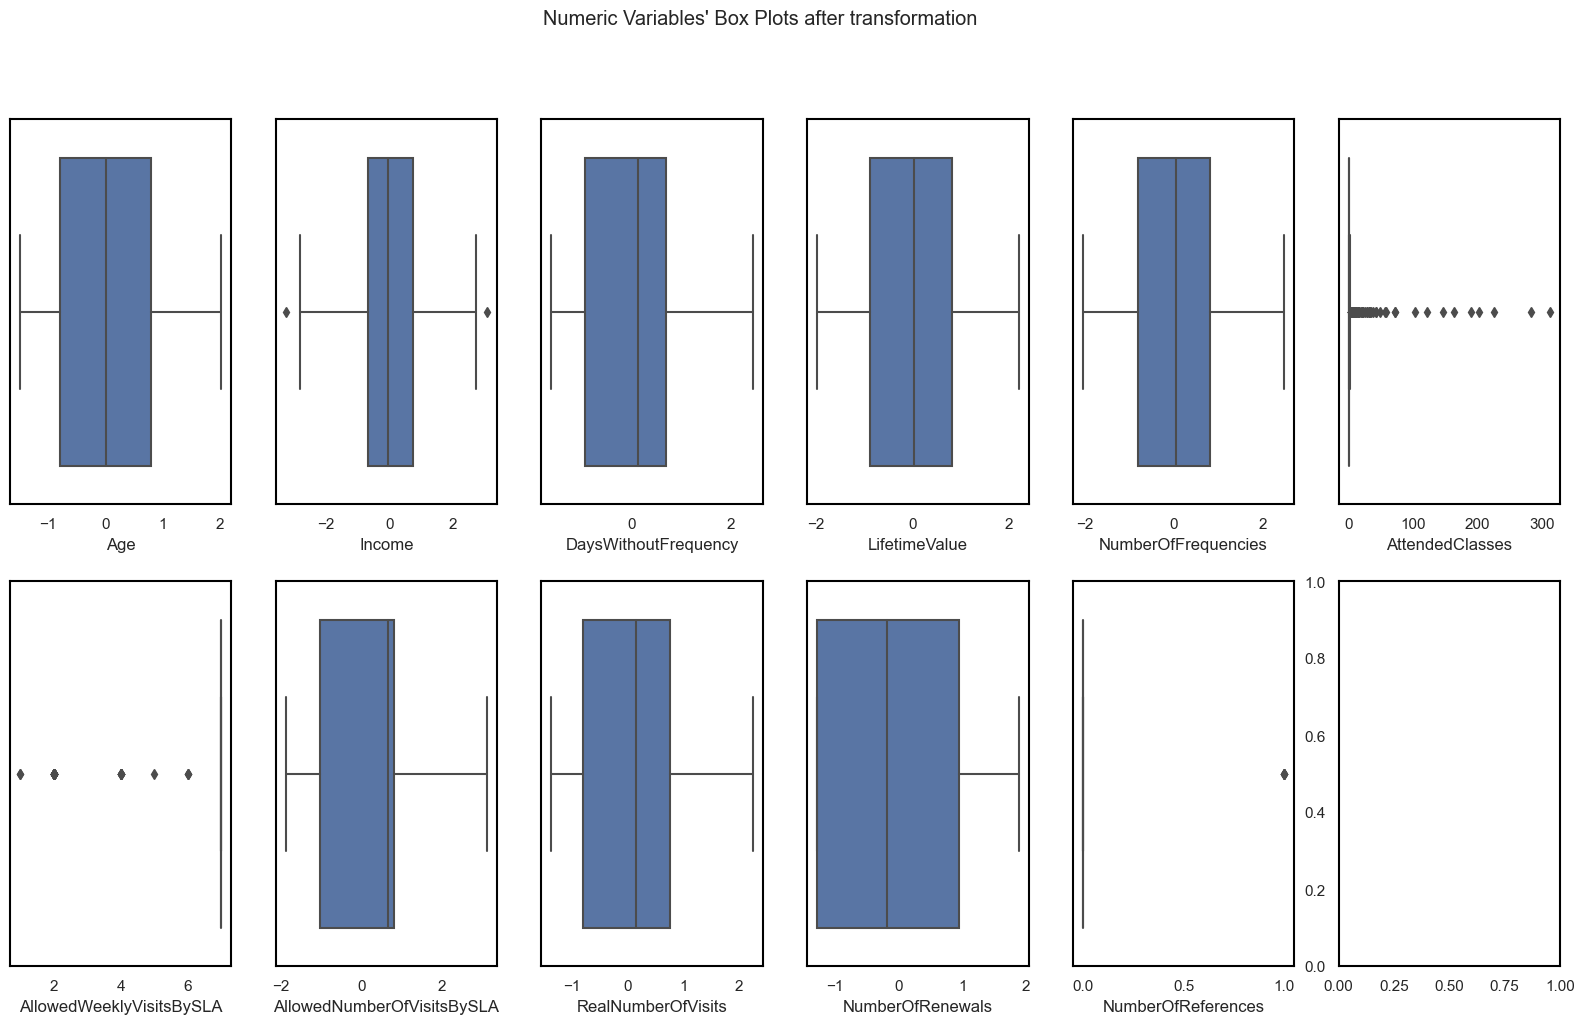

In [24]:
# Boxplots after transformations
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
title = "Numeric Variables' Box Plots after transformation"
plt.suptitle(title)
plt.show()

<div class="alert alert-block alert-success">

## Non metric features

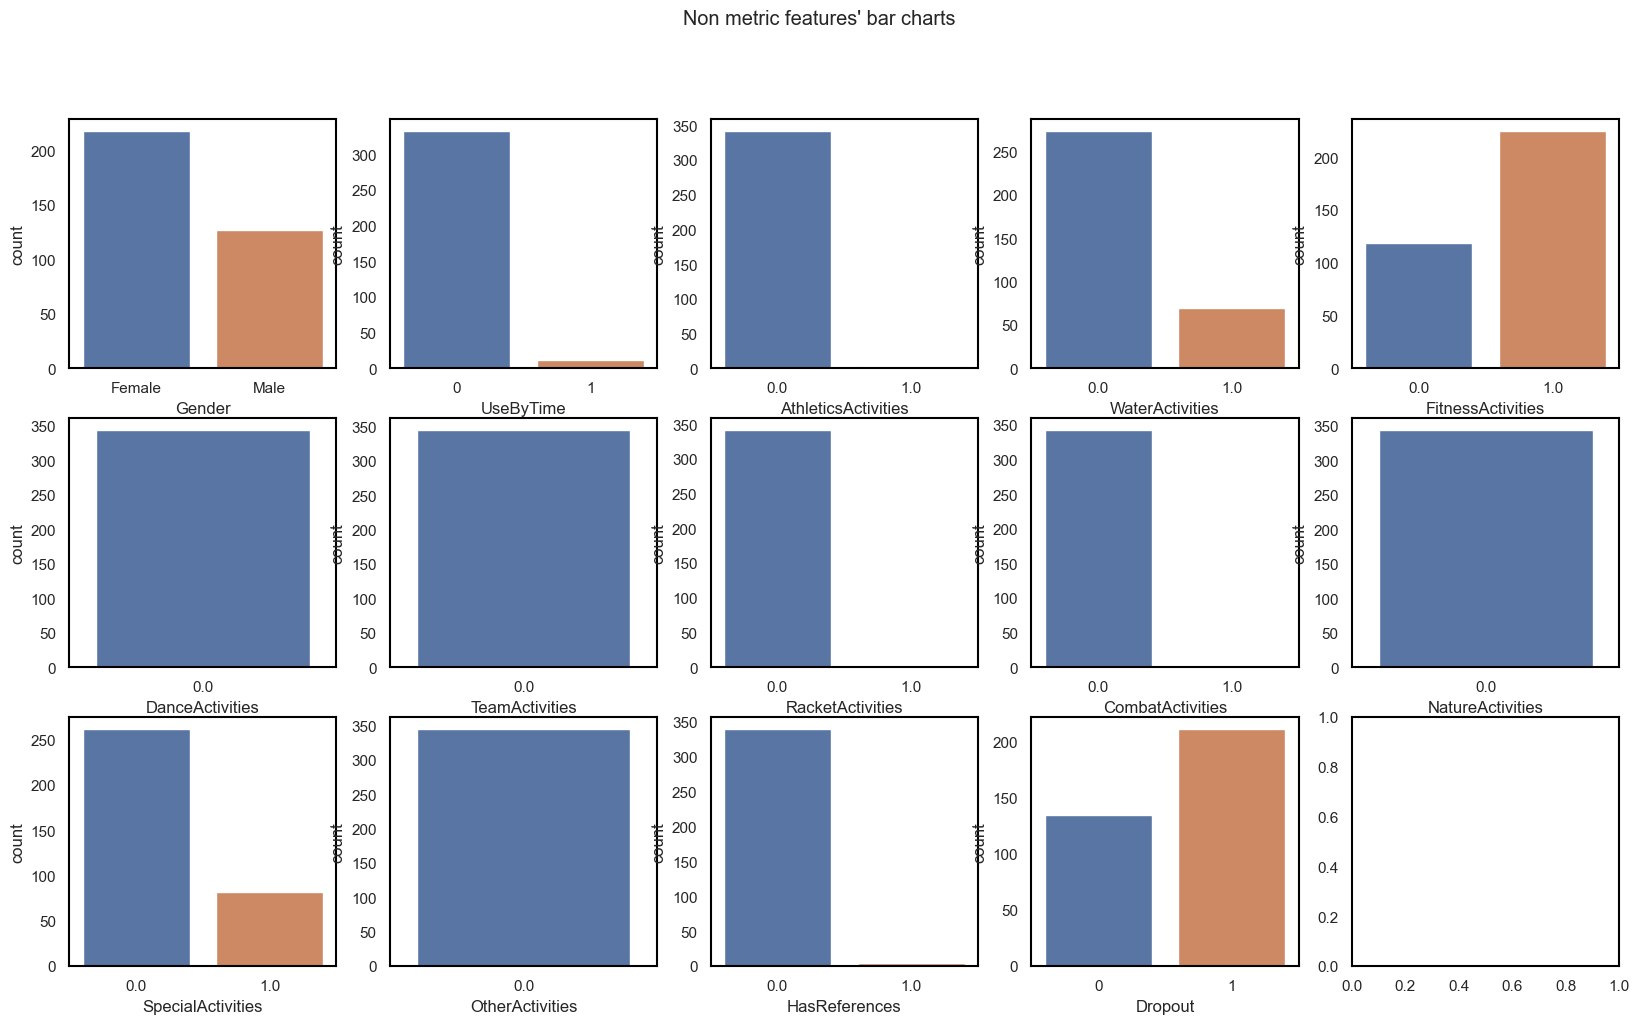

In [25]:
# All non-metric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features) / 3), figsize=(20, 11))

# Aesthetic
for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5)

# Plot data
for ax, feat in zip(axes.flatten(), non_metric_features): 
    sns.countplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Non metric features' bar charts"

plt.suptitle(title)

plt.show()

<div class="alert alert-block alert-success"> 

## Missing values


In [26]:
# Avoid having empty strings 
df.replace('', np.nan, inplace=True)

In [27]:
# Count missing values
df.isna().sum()

Age                            0
Gender                         0
Income                         0
EnrollmentStart                0
EnrollmentFinish               0
LastPeriodStart                0
LastPeriodFinish               0
DateLastVisit                  0
DaysWithoutFrequency           0
LifetimeValue                  0
UseByTime                      0
AthleticsActivities            0
WaterActivities                1
FitnessActivities              1
DanceActivities                1
TeamActivities                 0
RacketActivities               2
CombatActivities               0
NatureActivities               1
SpecialActivities              1
OtherActivities                0
NumberOfFrequencies            2
AttendedClasses                0
AllowedWeeklyVisitsBySLA      13
AllowedNumberOfVisitsBySLA     0
RealNumberOfVisits             0
NumberOfRenewals               0
HasReferences                  0
NumberOfReferences             0
Dropout                        0
dtype: int

<Axes: >

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0.
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\ProgramData\\anaconda3\\envs\\dm\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf

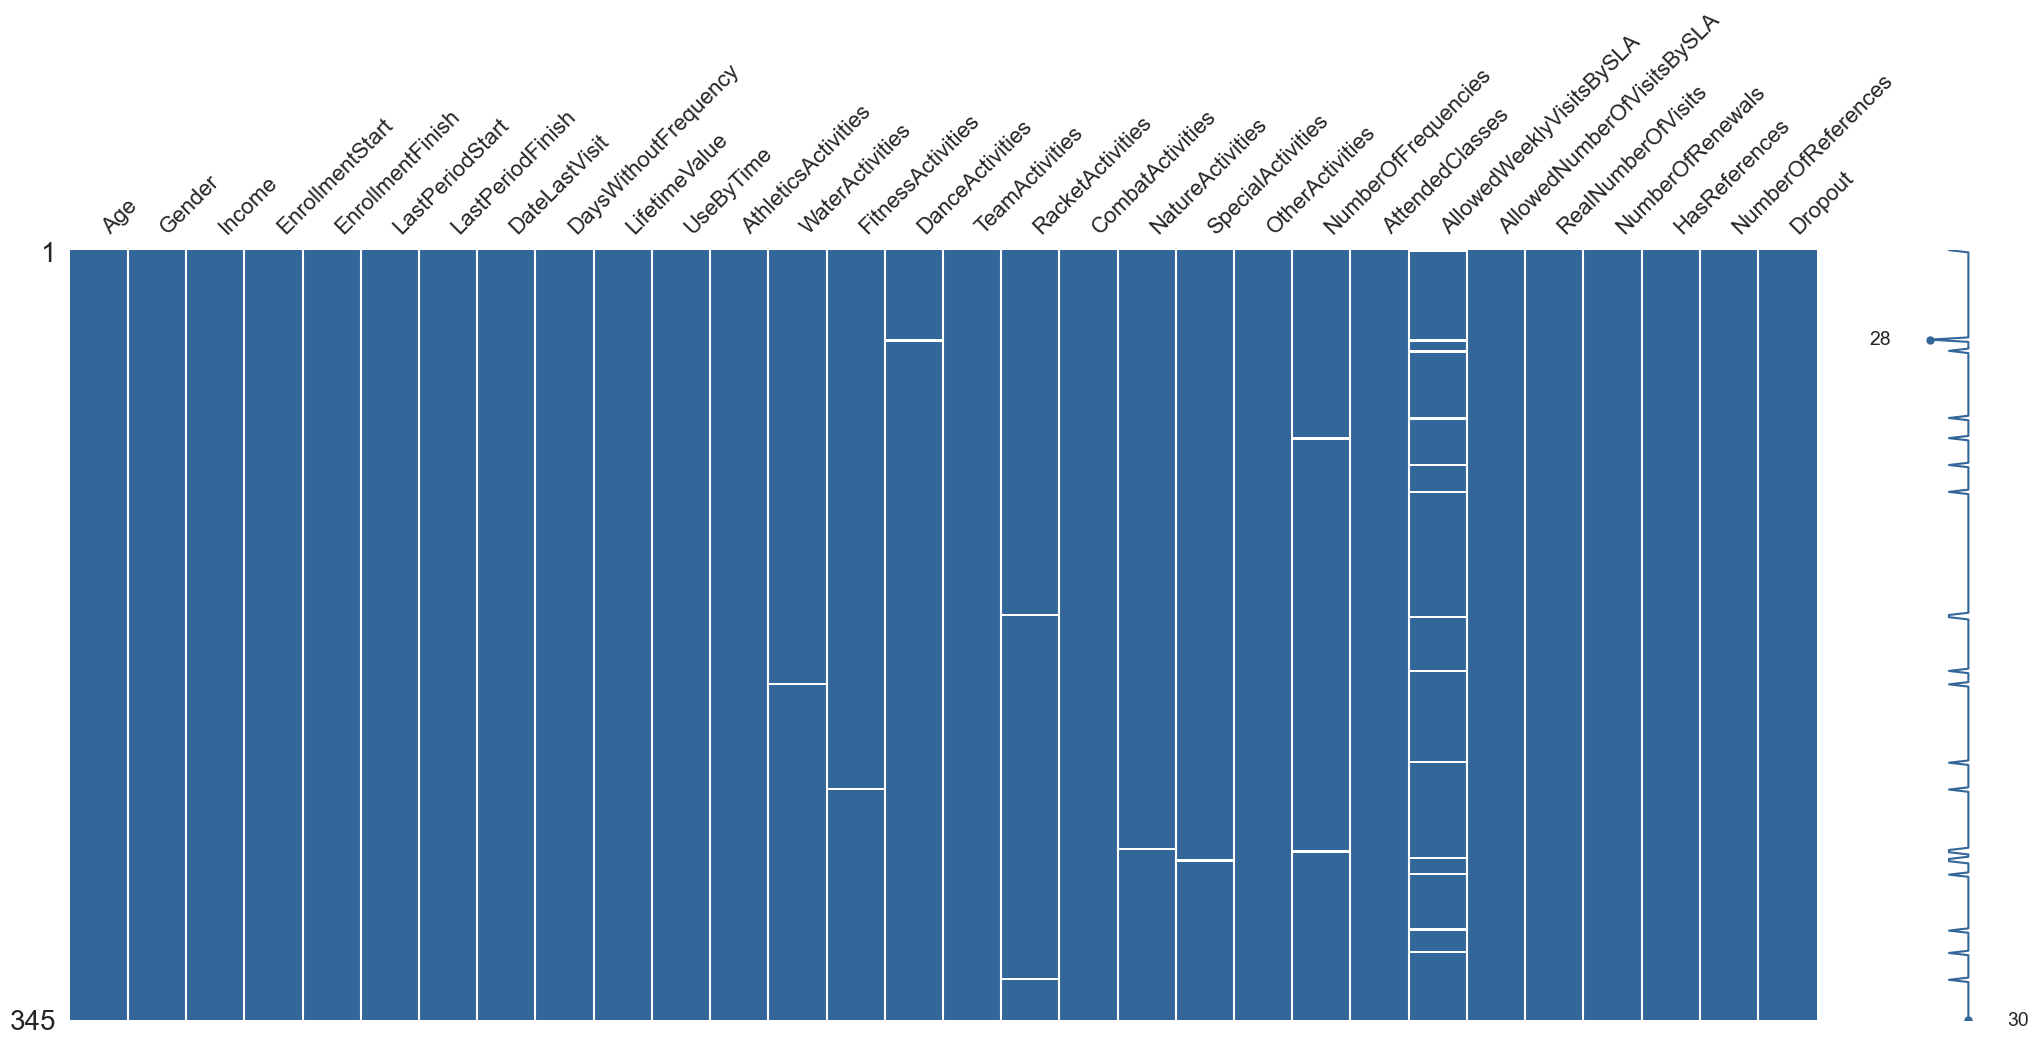

In [28]:
msno.matrix(df, color=(0.2, 0.4, 0.6))

**Missing values on Activities** <br>
It doesn's make sense that a client isn't enrolled on at least 1 activity.<br>
Therefore, if there's a missing value but the person isn't enrolled on any other activity, then that missing value will be 1.

In [29]:
activities = ['AthleticsActivities','WaterActivities', 'FitnessActivities', 'TeamActivities', 'RacketActivities', 'DanceActivities', 'NatureActivities',
 'CombatActivities','SpecialActivities', 'OtherActivities']

In [30]:
# Check in there's anyone that isn't in any activity

df[df[activities].eq(0).all(axis=1)]
# Verifica se cada elemento nas colunas especificadas é igual a 0 - > .eq(0) ,
# all(axis=1) verifica se todas as condições são verdadeiras

Empty DataFrame
Columns: [Age, Gender, Income, EnrollmentStart, EnrollmentFinish, LastPeriodStart, LastPeriodFinish, DateLastVisit, DaysWithoutFrequency, LifetimeValue, UseByTime, AthleticsActivities, WaterActivities, FitnessActivities, DanceActivities, TeamActivities, RacketActivities, CombatActivities, NatureActivities, SpecialActivities, OtherActivities, NumberOfFrequencies, AttendedClasses, AllowedWeeklyVisitsBySLA, AllowedNumberOfVisitsBySLA, RealNumberOfVisits, NumberOfRenewals, HasReferences, NumberOfReferences, Dropout]
Index: []

[0 rows x 30 columns]

In [31]:
for act in activities:
    # df[activities].drop(act, axis=1).eq(0).all(axis=1) 
    #-> retirando a act, verificar as restantes featues são 0
    condition = (df[act].isna()) & (df[activities].drop(act, axis=1).eq(0).all(axis=1))

    # substituir por 1    
    df.loc[condition, act] = 1

In [32]:
df.isna().sum()

Age                            0
Gender                         0
Income                         0
EnrollmentStart                0
EnrollmentFinish               0
LastPeriodStart                0
LastPeriodFinish               0
DateLastVisit                  0
DaysWithoutFrequency           0
LifetimeValue                  0
UseByTime                      0
AthleticsActivities            0
WaterActivities                1
FitnessActivities              0
DanceActivities                1
TeamActivities                 0
RacketActivities               2
CombatActivities               0
NatureActivities               1
SpecialActivities              1
OtherActivities                0
NumberOfFrequencies            2
AttendedClasses                0
AllowedWeeklyVisitsBySLA      13
AllowedNumberOfVisitsBySLA     0
RealNumberOfVisits             0
NumberOfRenewals               0
HasReferences                  0
NumberOfReferences             0
Dropout                        0
dtype: int

On categorical features and 'NumberOfFrequencies' since they don't have many missing values, we'll impute them with the mode

In [33]:
binary_features_to_fill = activities + ["HasReferences"]

df.fillna(df[binary_features_to_fill].mode().iloc[0],inplace=True)

For 'AllowedWeeklyVisitsBySLA' and 'Income' (5% missing values) we'll use the median.

In [34]:
scaler = RobustScaler()
scaled_feat = scaler.fit_transform(df[metric_features])

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputed_feat = imputer.fit_transform(scaled_feat)
df[metric_features] = scaler.inverse_transform(imputed_feat)

In [35]:
df.isna().sum()

Age                           0
Gender                        0
Income                        0
EnrollmentStart               0
EnrollmentFinish              0
LastPeriodStart               0
LastPeriodFinish              0
DateLastVisit                 0
DaysWithoutFrequency          0
LifetimeValue                 0
UseByTime                     0
AthleticsActivities           0
WaterActivities               0
FitnessActivities             0
DanceActivities               0
TeamActivities                0
RacketActivities              0
CombatActivities              0
NatureActivities              0
SpecialActivities             0
OtherActivities               0
NumberOfFrequencies           0
AttendedClasses               0
AllowedWeeklyVisitsBySLA      0
AllowedNumberOfVisitsBySLA    0
RealNumberOfVisits            0
NumberOfRenewals              0
HasReferences                 0
NumberOfReferences            0
Dropout                       0
dtype: int64

We do this to create new features without any problems

In [36]:
df[features_transform] = pt.inverse_transform(df[features_transform])

<div class="alert alert-block alert-info">

## Feature Engineering


In [37]:

df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish  \
ID                                                                  
10034  74.000139  Female  5210.0      2019-10-01       2019-10-31   
10095  82.999932    Male  5080.0      2017-01-09       2019-10-31   
10175  69.000032  Female  5780.0      2015-10-06       2016-02-29   
10217  69.000032  Female  4120.0      2017-01-05       2019-09-10   
10233  71.999948  Female  5590.0      2015-04-27       2019-10-31   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
ID                                                                           
10034      2019-07-01       2019-12-31    2019-10-11                  20.0   
10095      2019-07-01       2019-12-31    2019-10-30                   1.0   
10175      2015-07-01       2016-06-30    2015-12-03                  88.0   
10217      2019-07-01       2019-12-31    2019-07-30                  42.0   
10233      2019-07-01       2019-12-31    2019-10-17                  14.0   

       LifetimeValue  ...  OtherActivities  NumberOfFrequencies  \
ID                    ...                                         
10034          38.50  ...              0.0                  4.0   
10095         692.20  ...              0.0                291.0   
10175         166.60  ...              0.0                 14.0   
10217         970.60  ...              0.0                383.0   
10233        1221.76  ...              0.0                166.0   

       AttendedClasses  AllowedWeeklyVisitsBySLA  AllowedNumberOfVisitsBySLA  \
ID                                                                             
10034              0.0                       7.0                       30.03   
10095              0.0                       7.0                       59.01   
10175              0.0                       7.0                       62.02   
10217              0.0                       7.0                       62.02   
10233              1.0                       7.0                       17.01   

       RealNumberOfVisits  NumberOfRenewals  HasReferences  \
ID                                                           
10034                 4.0               0.0            0.0   
10095                46.0               3.0            0.0   
10175                 0.0               0.0            0.0   
10217                10.0               3.0            0.0   
10233                 2.0               5.0            0.0   

       NumberOfReferences  Dropout  
ID                                  
10034                 0.0        0  
10095                 0.0        0  
10175                 0.0        1  
10217                 0.0        1  
10233                 0.0        0  

[5 rows x 30 columns]

In [38]:
# Create Recency -> number of days since last visit
df["Recency"] = (pd.to_datetime("2019-10-31") - df["DateLastVisit"]).dt.days

# EnrollmentTime -> days spent enrolled
df["EnrollmentTime"] = (df["EnrollmentFinish"] - df["EnrollmentStart"]).dt.days

# AverageSpent -> average spent per visit in $
df["AverageSpent"] = df["LifetimeValue"] / df["NumberOfFrequencies"]

# HasRenewals -> if a person Renewal or not
df['HasRenewals'] = (df['NumberOfRenewals'] > 0).astype(int)

# ServiceVisitsRatio -> Ratio between the allowed and the real number of visits in the service time
df["ServiceVisitsRatio"] = df["RealNumberOfVisits"] / df["AllowedNumberOfVisitsBySLA"] 

# AttendedClassesPerVisit -> 
df["AttendedClassesPerVisit"] = df["AttendedClasses"] / df["NumberOfFrequencies"]

# EnrollmentTimeByRenewal -> Enrollment time between each Renewal
df["EnrollmentTimeByRenewal"] = df["EnrollmentTime"] / df["NumberOfRenewals"].replace(0, 1) # Replace 0 by 1 avoid null values

In [39]:
df.head()

Age  Gender  Income EnrollmentStart EnrollmentFinish  \
ID                                                                  
10034  74.000139  Female  5210.0      2019-10-01       2019-10-31   
10095  82.999932    Male  5080.0      2017-01-09       2019-10-31   
10175  69.000032  Female  5780.0      2015-10-06       2016-02-29   
10217  69.000032  Female  4120.0      2017-01-05       2019-09-10   
10233  71.999948  Female  5590.0      2015-04-27       2019-10-31   

      LastPeriodStart LastPeriodFinish DateLastVisit  DaysWithoutFrequency  \
ID                                                                           
10034      2019-07-01       2019-12-31    2019-10-11                  20.0   
10095      2019-07-01       2019-12-31    2019-10-30                   1.0   
10175      2015-07-01       2016-06-30    2015-12-03                  88.0   
10217      2019-07-01       2019-12-31    2019-07-30                  42.0   
10233      2019-07-01       2019-12-31    2019-10-17                  14.0   

       LifetimeValue  ...  HasReferences  NumberOfReferences  Dropout  \
ID                    ...                                               
10034          38.50  ...            0.0                 0.0        0   
10095         692.20  ...            0.0                 0.0        0   
10175         166.60  ...            0.0                 0.0        1   
10217         970.60  ...            0.0                 0.0        1   
10233        1221.76  ...            0.0                 0.0        0   

       Recency  EnrollmentTime  AverageSpent  HasRenewals  ServiceVisitsRatio  \
ID                                                                              
10034       20              30      9.625000            0            0.133200   
10095        1            1025      2.378694            1            0.779529   
10175     1428             146     11.900000            0            0.000000   
10217       93             978      2.534204            1            0.161238   
10233       14            1648      7.360000            1            0.117578   

       AttendedClassesPerVisit  EnrollmentTimeByRenewal  
ID                                                       
10034                 0.000000                30.000000  
10095                 0.000000               341.666667  
10175                 0.000000               146.000000  
10217                 0.000000               326.000000  
10233                 0.006024               329.600000  

[5 rows x 37 columns]

In [40]:
# Update metric_features
new_feats = ["Recency", "EnrollmentTime", "AverageSpent", "ServiceVisitsRatio", "AttendedClassesPerVisit", "EnrollmentTimeByRenewal"]
metric_features += new_feats

# Update non-metric features
non_metric_features.append('HasRenewals')

<div class="alert alert-block alert-info">

# Re-do data exploration


## Dimensionality Reduction

Date type variables won't be very useful for clustering. Since we extracted all the information we needed from them, they will be dropped.

In [41]:
# Drop date type varibles
df = df.drop(columns=['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit'])

<div class="alert alert-block alert-success">

## Metric features

vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03])
vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])
vmin 1.6663144451053657 vmax 92.4195312909636
ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+0

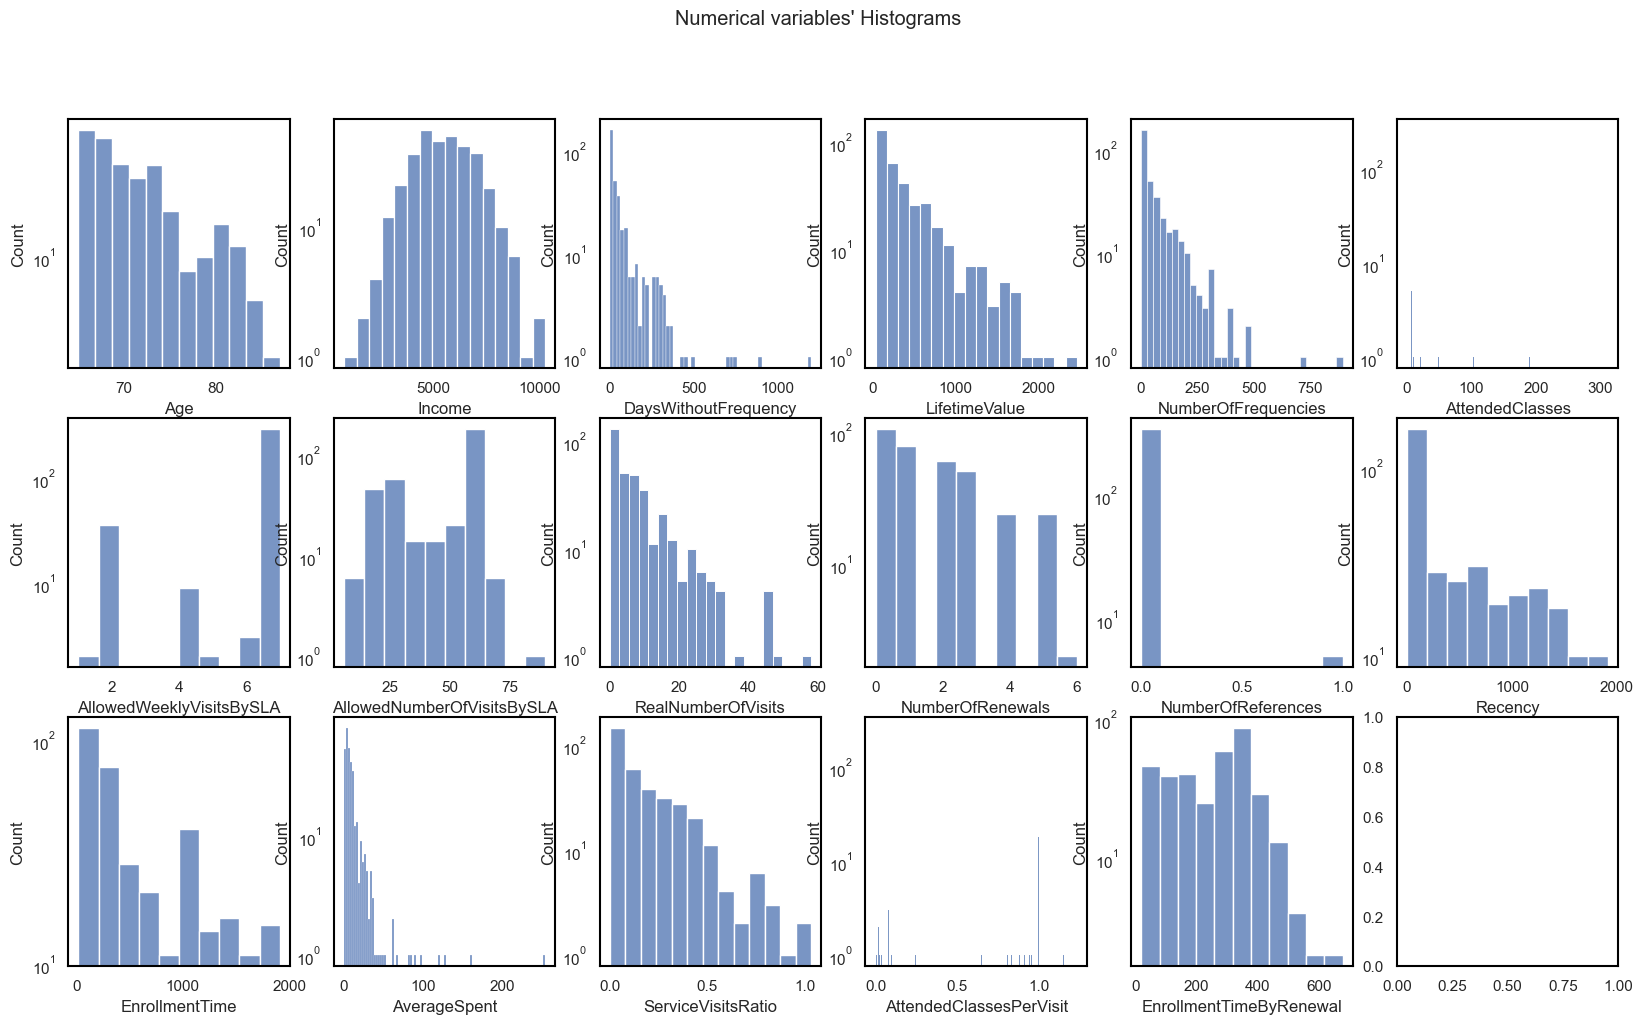

In [42]:
# Check distributions of new features
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis
    
# Layout
title = "Numerical variables' Histograms"
plt.suptitle(title)
plt.show()

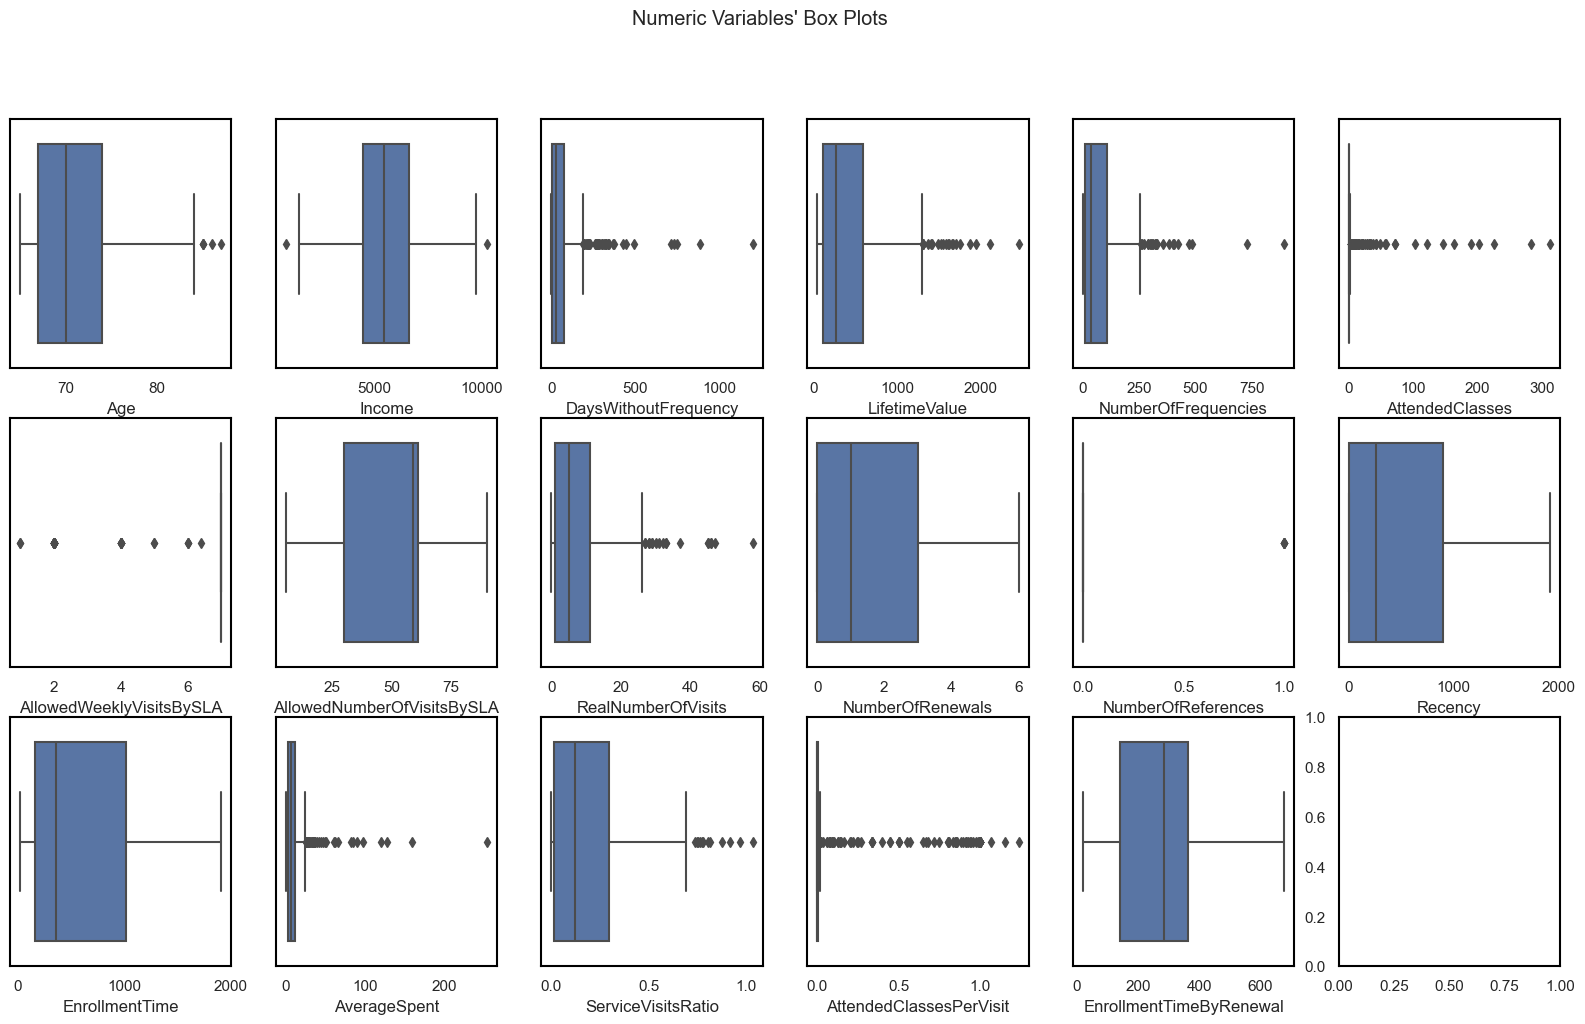

In [43]:
# Boxplots 
sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

<div class="alert alert-block alert-success">

## Transformations
</div>
Some of the new features need to suffer a transformation due to their positive skewness.

In [44]:
features_transform += ['EnrollmentTime', 'AverageSpent', 'ServiceVisitsRatio', 'AttendedClassesPerVisit', 'EnrollmentTimeByRenewal']

pt2 = PowerTransformer()

df[features_transform] = pd.DataFrame(pt2.fit_transform(df[features_transform]), index=df[features_transform].index, columns=df[features_transform].columns)

vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([   1.,   10.,  100., 1000.])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([   1.,   10.,  100., 1000.])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([   1.,   10.,  100., 1000.])
vmin 15.827358882177206 vmax 76.2603545534797
ticklocs array([2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03])
vmin 15.827358882177206 vmax 76.2603545534797
t

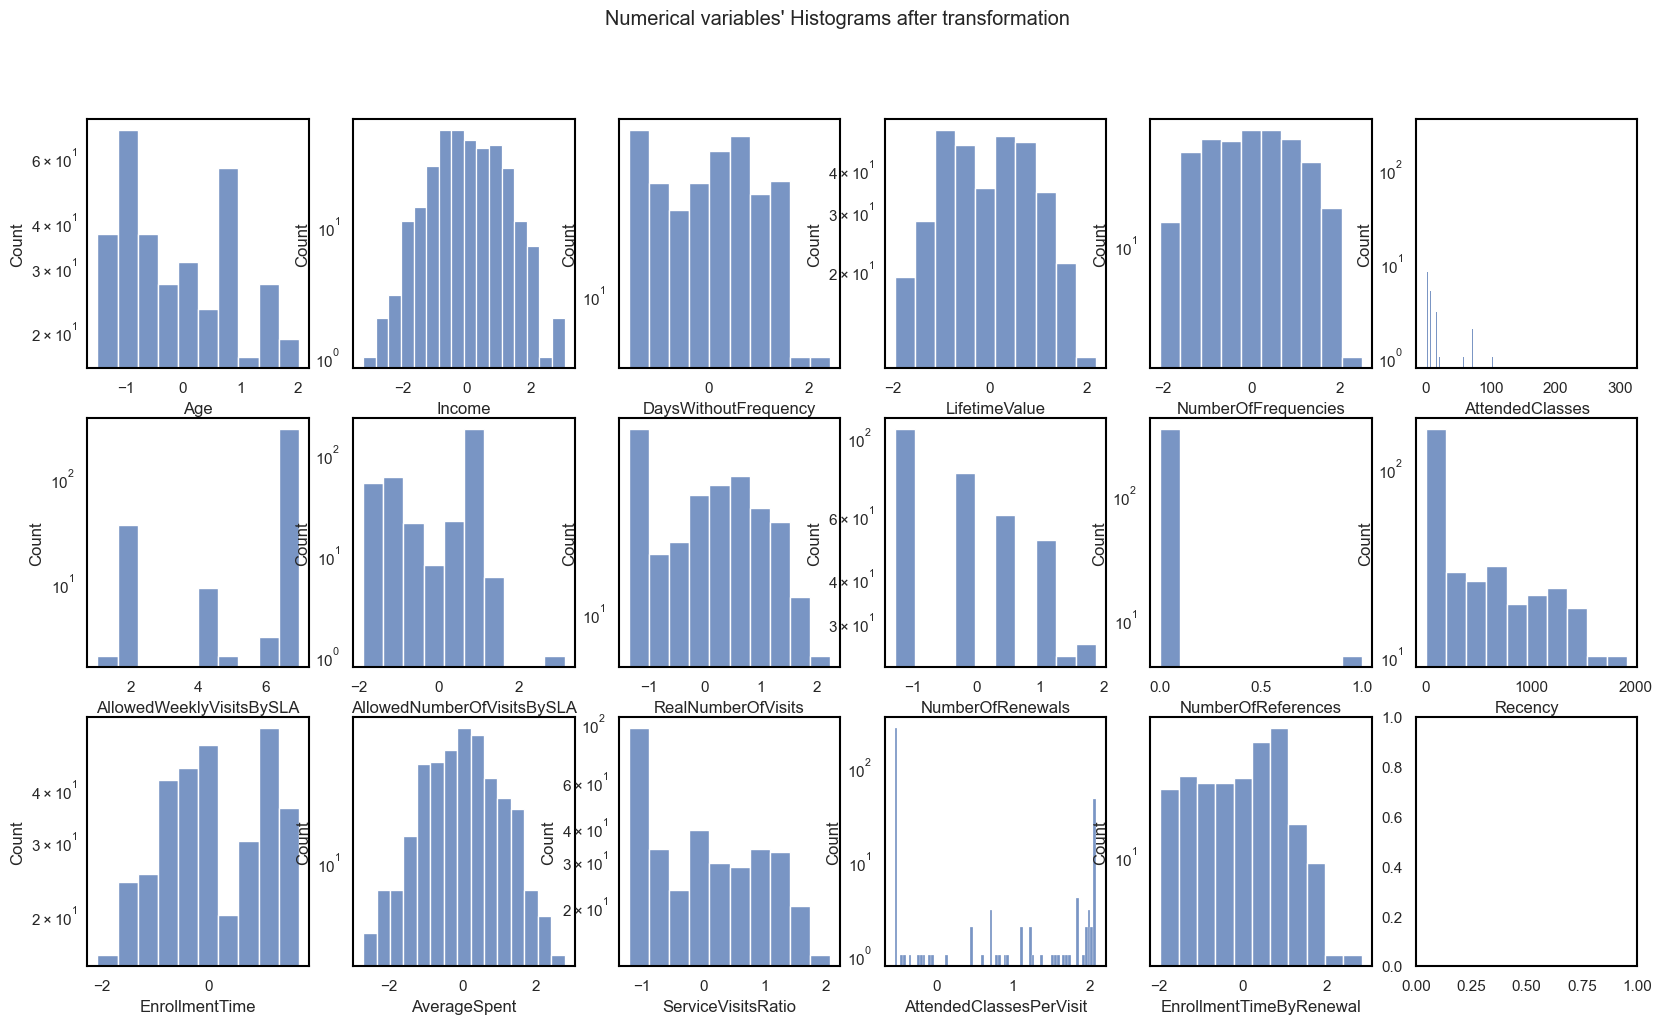

In [45]:
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 
            
# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=df[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis
    
# Layout
title = "Numerical variables' Histograms after transformation"
plt.suptitle(title)
plt.show()

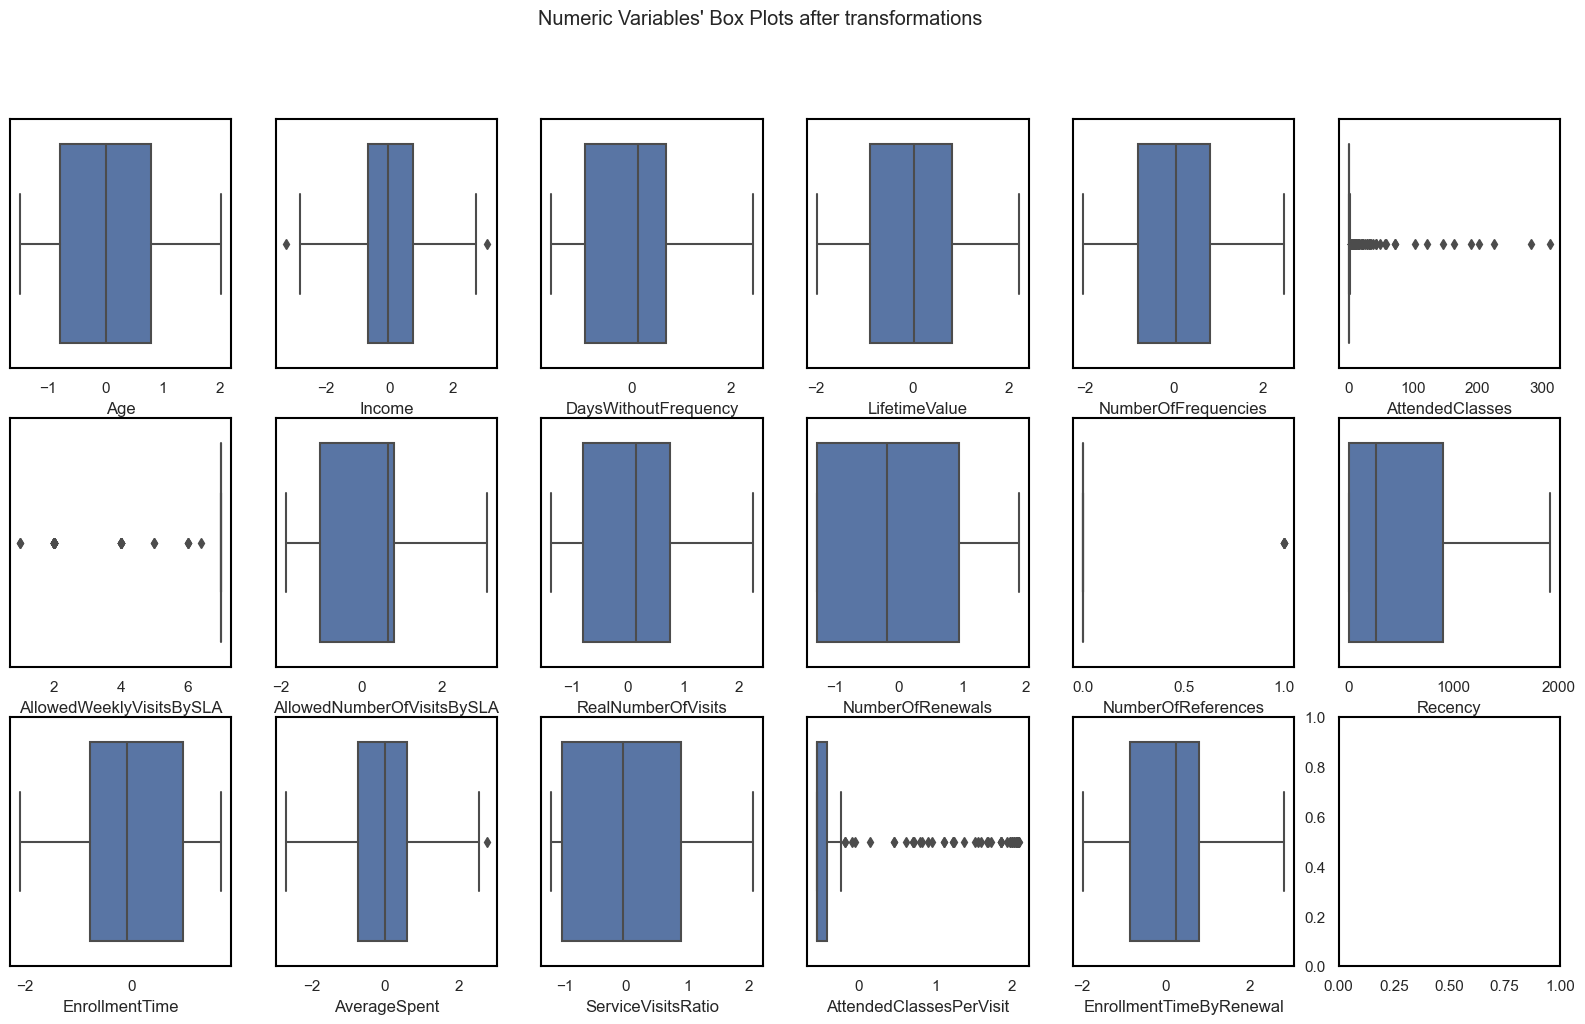

In [46]:
# Boxplots 
sns.set()
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
title = "Numeric Variables' Box Plots after transformations"
plt.suptitle(title)
plt.show()

<div class="alert alert-block alert-success">

## Non metric features

In [47]:
df_encoded = pd.get_dummies(df, columns=["Gender"], drop_first=True)
df_encoded.rename(columns={'Gender_Male': 'Male'}, inplace=True)
df = df_encoded

# update non_metric features
non_metric_features.remove('Gender')
non_metric_features.append('Male')

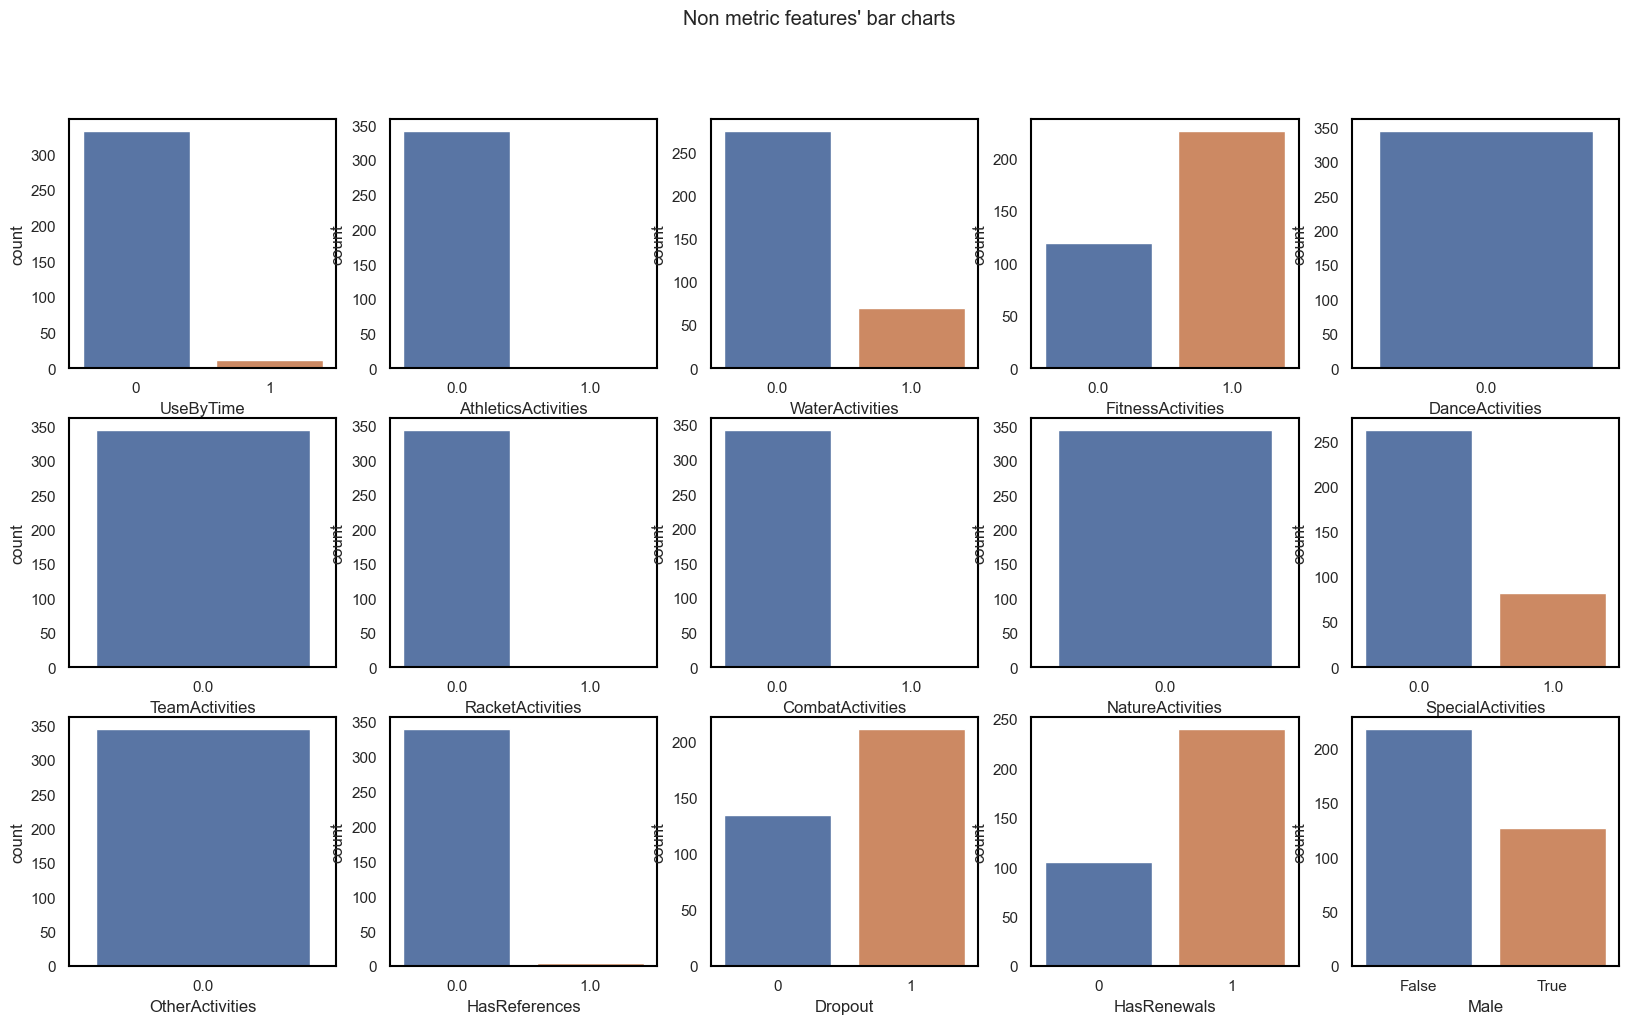

In [48]:
# All non-metric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features) / 3), figsize=(20, 11))

# Aesthetic
for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5)

# Plot data
for ax, feat in zip(axes.flatten(), non_metric_features): 
    sns.countplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Non metric features' bar charts"

plt.suptitle(title)

plt.show()

locator: <matplotlib.ticker.AutoLocator object at 0x000002D69A180BD0>


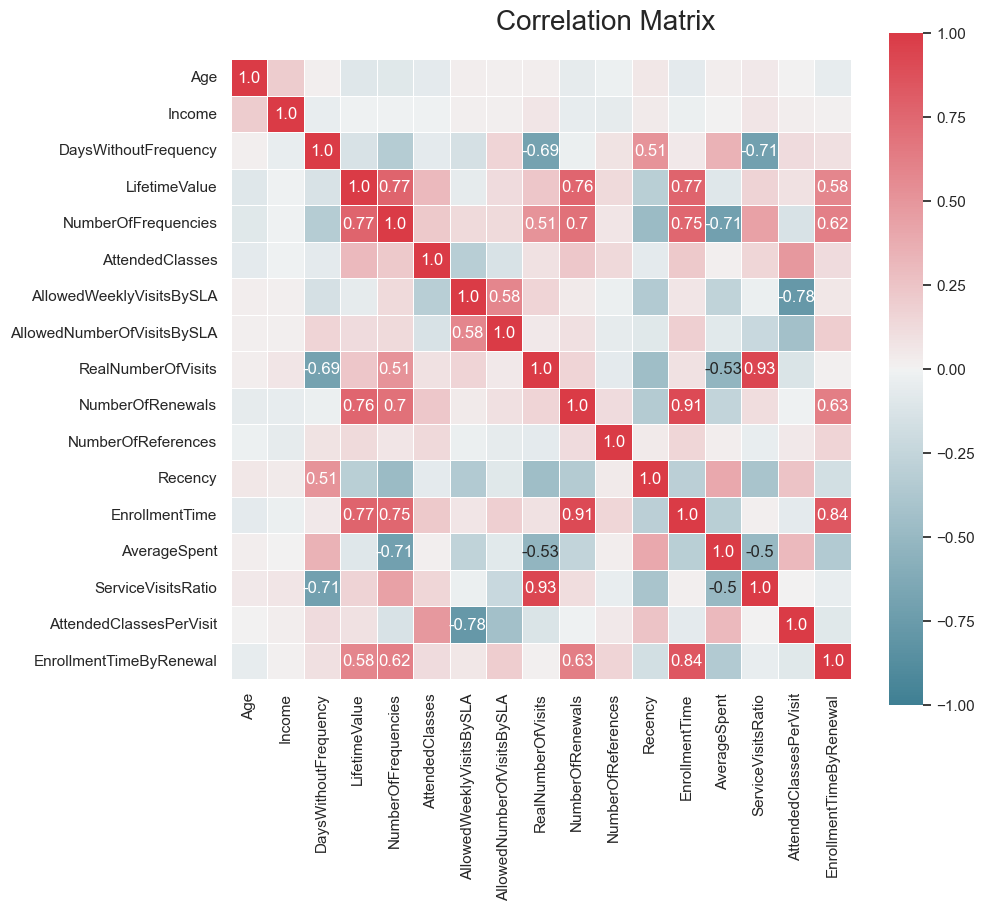

In [49]:
# Correlation Matrix
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = df[metric_features].corr().round(2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [50]:
df[features_transform] = pt2.inverse_transform(df[features_transform])

df[metric_features].mean()

Age                             71.046348
Income                        5526.521739
DaysWithoutFrequency            75.272464
LifetimeValue                  417.661072
NumberOfFrequencies             78.576078
AttendedClasses                  8.197101
AllowedWeeklyVisitsBySLA         6.343188
AllowedNumberOfVisitsBySLA      46.762174
RealNumberOfVisits               7.852174
NumberOfRenewals                 1.681159
NumberOfReferences               0.014493
Recency                        501.434783
EnrollmentTime                 585.765217
AverageSpent                    13.332232
ServiceVisitsRatio               0.184007
AttendedClassesPerVisit          0.145720
EnrollmentTimeByRenewal        257.768551
dtype: float64

In [51]:
# Create column with label of the cluster
df['labels'] = 7

In [52]:
df.head()

Age  Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                         
10034  73.999927  5210.0                  20.0          38.50          0   
10095  82.999555  5080.0                   1.0         692.20          0   
10175  68.999977  5780.0                  88.0         166.60          0   
10217  68.999977  4120.0                  42.0         970.60          0   
10233  71.999813  5590.0                  14.0        1221.76          0   

       AthleticsActivities  WaterActivities  FitnessActivities  \
ID                                                               
10034                  0.0              0.0                1.0   
10095                  0.0              0.0                0.0   
10175                  0.0              0.0                1.0   
10217                  0.0              0.0                1.0   
10233                  0.0              1.0                1.0   

       DanceActivities  TeamActivities  ...  Dropout  Recency  EnrollmentTime  \
ID                                      ...                                     
10034              0.0             0.0  ...        0       20            30.0   
10095              0.0             0.0  ...        0        1          1025.0   
10175              0.0             0.0  ...        1     1428           146.0   
10217              0.0             0.0  ...        1       93           978.0   
10233              0.0             0.0  ...        0       14          1648.0   

       AverageSpent  HasRenewals  ServiceVisitsRatio  AttendedClassesPerVisit  \
ID                                                                              
10034      9.625000            0            0.133200                 0.000000   
10095      2.378694            1            0.779529                 0.000000   
10175     11.900000            0            0.000000                 0.000000   
10217      2.534204            1            0.161238                 0.000000   
10233      7.360000            1            0.117578                 0.006024   

       EnrollmentTimeByRenewal   Male  labels  
ID                                             
10034                30.000000  False       7  
10095               341.666667   True       7  
10175               146.000000  False       7  
10217               326.000000  False       7  
10233               329.600000  False       7  

[5 rows x 33 columns]

In [53]:
df.to_csv('elders_preprocessing.csv')